# <center> Super-mart Sales Analytics

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from warnings import filterwarnings
filterwarnings ('ignore')
%matplotlib inline

## Task 1: Inital Data Exploration

In [2]:
#load and read super-mart sales data from csv
super_mart_sales_data= ("supermarket_sales.csv") 
df=pd.read_csv(super_mart_sales_data)

In [3]:
#view the first 5 rows of the data
print ("The first 5 rows of the data")
df.head()

The first 5 rows of the data


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#view the last 5 rows of the data
print ("The last 5 rows of the data")
df.tail()

The last 5 rows of the data


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [5]:
#view the dimensions of the data
print ('The number of rows and columns of the data')
df.shape

The number of rows and columns of the data


(1003, 17)

In [6]:
#obtain general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [7]:
#generate basic statistical information about the data
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

<AxesSubplot:xlabel='Rating', ylabel='Density'>

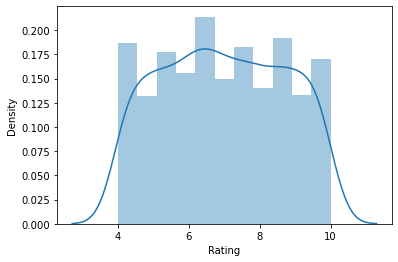

In [8]:
#Distribution of customer Ratings
sns.distplot (df['Rating'])

In [9]:
from scipy.stats import skew
print ('The value of the skewness for customer ratings is', skew (df['Rating']))

The value of the skewness for customer ratings is 0.009577997530100583


**Since the value of the skewnesss is close to zero, it is fairly a normal distribution.**

**Question 2:** Do aggregate sales numbers differ by much between branches?

In [10]:
#Calculating the aggregate sales in the branches
print ("The number of aggregate sales per Branch")
df['Branch'].value_counts()

The number of aggregate sales per Branch


A    342
B    333
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

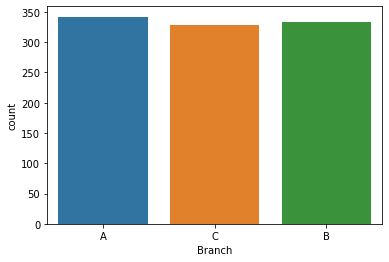

In [11]:
sns.countplot(df['Branch'])

**No, there is no much difference in the aggregate sales between branches**

## Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

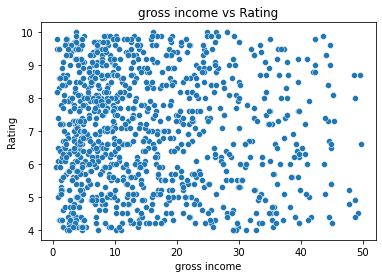

In [14]:
#Plotting the two variables (gross income and customer ratings)
sns.scatterplot(df["gross income"], df["Rating"])
plt.title('gross income vs Rating')
plt.show()

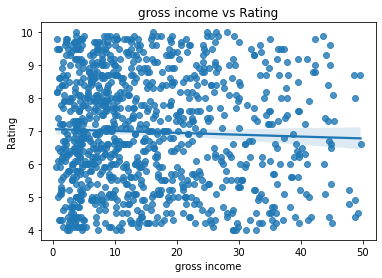

In [15]:
#Determining the relationship between two variables (gross income and customer ratings)
sns.regplot(df["gross income"], df["Rating"])
plt.title ('gross income vs Rating')
plt.show()

**There is no relationship between gross income and customer ratings**

## Task 4: Dealing With Duplicate Rows and Missing Values

In [16]:
#Identify and handle missing values
missing_values= df.isnull()
missing_values.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#Count missing values in each column
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

Invoice ID
False    1003
Name: Invoice ID, dtype: int64

Branch
False    1003
Name: Branch, dtype: int64

City
False    1003
Name: City, dtype: int64

Customer type
False    924
True      79
Name: Customer type, dtype: int64

Gender
False    1003
Name: Gender, dtype: int64

Product line
False    960
True      43
Name: Product line, dtype: int64

Unit price
False    996
True       7
Name: Unit price, dtype: int64

Quantity
False    983
True      20
Name: Quantity, dtype: int64

Tax 5%
False    1003
Name: Tax 5%, dtype: int64

Total
False    1003
Name: Total, dtype: int64

Date
False    1003
Name: Date, dtype: int64

Time
False    1003
Name: Time, dtype: int64

Payment
False    1003
Name: Payment, dtype: int64

cogs
False    1003
Name: cogs, dtype: int64

gross margin percentage
False    1003
Name: gross margin percentage, dtype: int64

gross income
False    1003
Name: gross income, dtype: int64

Rating
False    1003
Name: Rating, dtype: int64



**This shows that Customer type, Product line, Unit Price and Quanitity columns have missing values**

In [18]:
#Remove missing values in the columns
df. dropna(inplace=True)

In [19]:
#Verify the transformed columns
df.isnull ().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**There is no missing value anymore in the data**

In [20]:
#Show duplicates in the data
df.duplicated ().sum()

1

In [21]:
#Remove duplicates from the data
df.drop_duplicates(inplace=True)

In [22]:
#Verify that the duplicate has been removed
df.duplicated ().sum()

0

**There is no duplicate value anymore in the data**

In [23]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
